### Connect Google Drive

In [ ]:
from google.colab import drive
import os

drive.mount("/gdrive")
mygdrive = "/gdrive/My Drive"

os.listdir(mygdrive)[:10]


MessageError: Error: credential propagation was unsuccessful

### Download COCO annotations

In [ ]:
#coco
os.chdir('/content')
!mkdir coco
os.chdir('coco')

!wget -c http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip annotations_trainval2017.zip
!rm annotations_trainval2017.zip

!wget -c http://images.cocodataset.org/annotations/stuff_annotations_trainval2017.zip
!unzip stuff_annotations_trainval2017.zip
!rm stuff_annotations_trainval2017.zip

--2024-05-29 05:17:56--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.208.97, 52.217.207.25, 3.5.10.140, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.208.97|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  65.4MB/s    in 3.9s    

2024-05-29 05:18:00 (62.1 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  
--2024-05-29 05:18:16--  http://images

### Download COCO train val images

In [ ]:
os.chdir('/content/coco')
!mkdir images
os.chdir('images')

!wget -c http://images.cocodataset.org/zips/train2017.zip
!unzip train2017.zip
!rm train2017.zip

!wget -c http://images.cocodataset.org/zips/val2017.zip
!unzip val2017.zip
!rm val2017.zip

Streaming output truncated to the last 5000 lines.
 extracting: val2017/000000212226.jpg  
 extracting: val2017/000000231527.jpg  
 extracting: val2017/000000578922.jpg  
 extracting: val2017/000000062808.jpg  
 extracting: val2017/000000119038.jpg  
 extracting: val2017/000000114871.jpg  
 extracting: val2017/000000463918.jpg  
 extracting: val2017/000000365745.jpg  
 extracting: val2017/000000320425.jpg  
 extracting: val2017/000000481404.jpg  
 extracting: val2017/000000314294.jpg  
 extracting: val2017/000000335328.jpg  
 extracting: val2017/000000513688.jpg  
 extracting: val2017/000000158548.jpg  
 extracting: val2017/000000132116.jpg  
 extracting: val2017/000000415238.jpg  
 extracting: val2017/000000321333.jpg  
 extracting: val2017/000000081738.jpg  
 extracting: val2017/000000577584.jpg  
 extracting: val2017/000000346905.jpg  
 extracting: val2017/000000433980.jpg  
 extracting: val2017/000000228144.jpg  
 extracting: val2017/000000041872.jpg  
 extracting: val2017/00000011

### Download COCO images info and unlabelled

In [ ]:




# !wget -c http://images.cocodataset.org/annotations/image_info_test2017.zip
# !unzip image_info_test2017.zip
# !rm image_info_test2017.zip

# !wget -c http://images.cocodataset.org/annotations/image_info_unlabeled2017.zip
# !unzip image_info_unlabeled2017.zip
# !rm image_info_unlabeled2017.zip



# !wget -c http://images.cocodataset.org/zips/test2017.zip
# !unzip test2017.zip
# !rm test2017.zip

# !wget -c http://images.cocodataset.org/zips/unlabeled2017.zip
# !unzip unlabeled2017.zip
# !rm unlabeled2017.zip




### Check coco val annotations

In [ ]:
import subprocess, json, pandas as pd

with open("/content/coco/annotations/instances_val2017.json", 'r') as f:
  val_trimmed = json.loads(f.read())

print(val_trimmed.keys())
cat_df = pd.DataFrame(val_trimmed['categories'])
valtrimano_df = pd.DataFrame(val_trimmed['annotations'])
print(valtrimano_df.shape)
# cat_df.head()
# valtrimano_df.head()
print(val_trimmed['categories'])

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])
(36781, 7)
[{'supercategory': 'person', 'id': 1, 'name': 'person'}, {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}, {'supercategory': 'vehicle', 'id': 3, 'name': 'car'}, {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}, {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}, {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'}, {'supercategory': 'vehicle', 'id': 7, 'name': 'train'}, {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'}, {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'}, {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'}, {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'}, {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'}, {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'}, {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}, {'supercategory': 'animal', 'id': 16, 'name': 'bird'}, {'supercategory': 'animal', 'id': 17, 'na

### Trim COCO dataset

In [ ]:
def split_path_all(path):
  splitted = []
  while True:
    earlypath, lastpath = os.path.split(path)
    if lastpath=='':
      splitted.append(earlypath)
      break
    path = earlypath
    splitted.append(lastpath)
  return splitted[::-1]

print(split_path_all('/content/project/file.txt'))

['/', 'content', 'project', 'file.txt']


In [ ]:
import os

# name: int/float (int for real amount, float (0.0-1.0 for percentage))
CATEGORIES_COUNT = {
    # 'Apple': 16,
    # 'Avocado': 16
    'person': 5000,
    'bicycle': 1.0
}

# Remap the category id (for example, some code works with coco category index start from 0,
# but the original coco dataset starts from 1)
CATEGORY_ID_REMAP = {1:0, 2:1}
OUTPUT_DIR = '/content/trimmed_coco'

if not os.path.isdir(OUTPUT_DIR):
  os.mkdir(OUTPUT_DIR)

In [ ]:
import json
import pandas as pd

annotation_files = [
    # '/content/dataset/train_annotations.json',
    # '/content/dataset/valid_annotations.json'
    '/content/coco/annotations/instances_train2017.json',
    '/content/coco/annotations/instances_val2017.json'
]

all_output_files = []

for ano_filename in annotation_files: # For each annotation files
  print('='*10, ano_filename, '='*10)

  # Read the annotation file
  with open(ano_filename, 'r') as anot:
    anot_json = json.loads(anot.read())
  print(anot_json.keys())

  # Parse the category into a dictionary with name:id
  all_categories_ids = {i['name']:i['id'] for i in anot_json['categories']}
  print(all_categories_ids)

  anno_df = pd.DataFrame(anot_json['annotations']) # Turn the annotation content to a dataframe
  print('anno_df before drop na:', anno_df.shape)
  anno_df = anno_df.dropna() # remove all nan values
  print('anno_df after drop na:', anno_df.shape)

  # convert to tuple so can be used as dictionary key
  anno_df['bbox'] = anno_df['bbox'].apply(lambda x: tuple(x))
  anno_df['segmentation'] = anno_df['segmentation'].apply(lambda x: tuple([tuple(i) for i in x]))

  # Parse all categories to a dict with cat_name: all_cat_ids and filter it based on the configs
  category_ids = {category_name: all_categories_ids[category_name] for category_name in CATEGORIES_COUNT}
  # Filter all the annotations that included in category_ids
  anno_filtered_df = anno_df[anno_df['category_id'].isin(category_ids.values())]

  img_df = pd.DataFrame(anot_json['images'])
  all_trimmed_imgs = []
  all_trimmed_annotations = []

  # For each category and the count in config
  for cat, amount in CATEGORIES_COUNT.items():
    category_id = category_ids[cat]

    # Filter all the image ids based on the filtered annotations
    unique_img_ids_catbased = anno_filtered_df[anno_filtered_df['category_id']==category_id]['image_id'].unique()
    unique_img_df = img_df[img_df['id'].isin(unique_img_ids_catbased)] # Get all the images based on filtered img ids

    # Trim the image counts based on configs
    trimming_slice = int(unique_img_df.shape[0]*amount) if type(amount)==float else amount
    print(f'images category {cat} before trim: {unique_img_df.shape}')
    unique_img_df = unique_img_df.reset_index().loc[:trimming_slice]
    print(f'images category {cat} after trim ({trimming_slice}): {unique_img_df.shape}')
    print(f'annotations category {cat} before trim: {anno_filtered_df.shape}')

     # filter based on category and image id, because 1 image could contain multiple annotation categories
    trimmed_ano_df = anno_filtered_df[anno_filtered_df['image_id'].isin(unique_img_df['id'].unique())]

    print(f'annotations category {cat} after trim: {trimmed_ano_df.shape}')
    all_trimmed_imgs.append(unique_img_df)
    all_trimmed_annotations.append(trimmed_ano_df)

  # Prepare to export the trimmed dataset
  filtered_img_df = pd.concat(all_trimmed_imgs, ignore_index=True).drop_duplicates()
  filtered_annotations_df = pd.concat(all_trimmed_annotations, ignore_index=True).drop_duplicates()
  filtered_annotations_df['category_id'] = filtered_annotations_df['category_id'].map(CATEGORY_ID_REMAP)
  cat_df = pd.DataFrame(anot_json['categories'])
  cat_df = cat_df[cat_df['id'].isin(category_ids.values())]
  cat_df['id'] = cat_df['id'].map(CATEGORY_ID_REMAP)
  anot_json['annotations'] = json.loads(filtered_annotations_df.to_json(orient='records'))
  anot_json['images'] = json.loads(filtered_img_df.to_json(orient='records'))
  anot_json['categories'] = json.loads(cat_df.to_json(orient='records'))
  print(f'final counts: annotations: {filtered_annotations_df.shape}, images: {filtered_img_df.shape}, categories: {len(anot_json["categories"])}, ')

  # Export the trimmed dataset
  file_name, extension = split_path_all(ano_filename)[-1].split('.')
  new_filename = f'new1_{file_name}_coco_trimmed.{extension}'
  dest = os.path.join(OUTPUT_DIR, new_filename)
  with open(dest, 'w+') as outfile:
    outfile.write(json.dumps(anot_json))
  all_output_files.append(dest)
  print('outputfile:', dest)

========== /content/coco/annotations/instances_train2017.json ==========
dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])
{'person': 1, 'bicycle': 2, 'car': 3, 'motorcycle': 4, 'airplane': 5, 'bus': 6, 'train': 7, 'truck': 8, 'boat': 9, 'traffic light': 10, 'fire hydrant': 11, 'stop sign': 13, 'parking meter': 14, 'bench': 15, 'bird': 16, 'cat': 17, 'dog': 18, 'horse': 19, 'sheep': 20, 'cow': 21, 'elephant': 22, 'bear': 23, 'zebra': 24, 'giraffe': 25, 'backpack': 27, 'umbrella': 28, 'handbag': 31, 'tie': 32, 'suitcase': 33, 'frisbee': 34, 'skis': 35, 'snowboard': 36, 'sports ball': 37, 'kite': 38, 'baseball bat': 39, 'baseball glove': 40, 'skateboard': 41, 'surfboard': 42, 'tennis racket': 43, 'bottle': 44, 'wine glass': 46, 'cup': 47, 'fork': 48, 'knife': 49, 'spoon': 50, 'bowl': 51, 'banana': 52, 'apple': 53, 'sandwich': 54, 'orange': 55, 'broccoli': 56, 'carrot': 57, 'hot dog': 58, 'pizza': 59, 'donut': 60, 'cake': 61, 'chair': 62, 'couch': 63, 'potted plant': 

### Pack with the images (into YOLO form)

In [ ]:
def convert_coco_bbox_to_ultralytics(coco_bbox, img_w, img_h, invalid_value=0.0):
  x = coco_bbox[0]
  y = coco_bbox[1]
  w = coco_bbox[2]
  h = coco_bbox[3]

  # Finding midpoints
  x_centre = (x + (x+w))/2
  y_centre = (y + (y+h))/2

  # Normalization
  x_centre = x_centre / img_w
  y_centre = y_centre / img_h
  w = w / img_w
  h = h / img_h

  # Limiting upto fix number of decimal places
  x_centre = format(x_centre, '.6f')
  y_centre = format(y_centre, '.6f')
  w = format(w, '.6f')
  h = format(h, '.6f')

  return x_centre, y_centre, w, h

def zip_files(file_paths_arcs, output_zip_file):
    with zipfile.ZipFile(output_zip_file, 'w', zipfile.ZIP_DEFLATED) as zip_obj:
        for i, file_path_arc in enumerate(file_paths_arcs):
            print(f'{i}/{len(file_paths_arcs)}')
            file_path, arc = file_path_arc
            zip_obj.write(file_path, arcname=arc)

def convert_ultralytics_to_coco_bbox(ultralytics_bbox, image_width, image_height):
  center_x, center_y, width, height = ultralytics_bbox

  # Convert normalized center to pixel coordinates
  center_x = int(center_x * image_width)
  center_y = int(center_y * image_height)

  # Calculate half width and half height
  half_width = int(width * image_width / 2.0)
  half_height = int(height * image_height / 2.0)

  # Get top left and bottom right corners
  xmin = max(0, center_x - half_width)
  ymin = max(0, center_y - half_height)
  xmax = min(image_width - 1, center_x + half_width)
  ymax = min(image_height - 1, center_y + half_height)

  return [xmin, ymin, xmax, ymax]


In [ ]:
import zipfile
import cv2
import shutil


def pack_yolo_imgs(anno_paths, data_names, temp_dir='/content/temp'):
    if not os.path.isdir(temp_dir):
      os.makedirs(temp_dir)

    all_img_file_paths = []
    all_anno_file_paths = []
    for anno_path, data_name in zip(anno_paths, data_names):
      print(data_name, anno_path)
      with open(anno_path, 'r') as f:
        anno_trimmed = json.loads(f.read())
        imagestrim_df = pd.DataFrame(anno_trimmed['images'])
        annotrim_df = pd.DataFrame(anno_trimmed['annotations'])
        img_file_names = list(imagestrim_df['file_name'])

        # get all the annotations for each every images, and convert the format
        for idx, img_id_name in enumerate(zip(imagestrim_df['id'], imagestrim_df['file_name'])):
          print(f'{idx}/{len(img_file_names)}')
          img_id, img_name = img_id_name
          h, w, c = cv2.imread(os.path.join('/content/coco/images/', data_name, img_name)).shape
          annos_to_img = annotrim_df[annotrim_df['image_id']==img_id]
          converted_annos = [' '.join([str(cat_id)] + [str(ubbox) for ubbox in convert_coco_bbox_to_ultralytics(bbox, w, h)]) for bbox, cat_id in zip(annos_to_img['bbox'], annos_to_img['category_id'])]
          # all_anno_file_paths[img_id] = converted_annos
          new_anno_fname = f'{img_id}.txt'
          img_anno_path = os.path.join(temp_dir, new_anno_fname)
          with open(img_anno_path, 'w+') as new_anno_file:
            new_anno_file.write('\n'.join(converted_annos))
          all_anno_file_paths.append((img_anno_path, os.path.join('labels', data_name, new_anno_fname)))

        img_file_paths = [(os.path.join('/content/coco/images/', data_name, img_name), os.path.join('images', data_name, img_name)) for img_name in img_file_names]
        all_img_file_paths.extend(img_file_paths)

    return all_anno_file_paths, all_img_file_paths

trimmed_anno_paths = ['/content/trimmed_coco/new1_instances_val2017_coco_trimmed.json', '/content/trimmed_coco/new1_instances_train2017_coco_trimmed.json']
anno_types = ['val2017', 'train2017']
tannos, timgs = pack_yolo_imgs(trimmed_anno_paths, anno_types)


Streaming output truncated to the last 5000 lines.
3051/8051
3052/8051
3053/8051
3054/8051
3055/8051
3056/8051
3057/8051
3058/8051
3059/8051
3060/8051
3061/8051
3062/8051
3063/8051
3064/8051
3065/8051
3066/8051
3067/8051
3068/8051
3069/8051
3070/8051
3071/8051
3072/8051
3073/8051
3074/8051
3075/8051
3076/8051
3077/8051
3078/8051
3079/8051
3080/8051
3081/8051
3082/8051
3083/8051
3084/8051
3085/8051
3086/8051
3087/8051
3088/8051
3089/8051
3090/8051
3091/8051
3092/8051
3093/8051
3094/8051
3095/8051
3096/8051
3097/8051
3098/8051
3099/8051
3100/8051
3101/8051
3102/8051
3103/8051
3104/8051
3105/8051
3106/8051
3107/8051
3108/8051
3109/8051
3110/8051
3111/8051
3112/8051
3113/8051
3114/8051
3115/8051
3116/8051
3117/8051
3118/8051
3119/8051
3120/8051
3121/8051
3122/8051
3123/8051
3124/8051
3125/8051
3126/8051
3127/8051
3128/8051
3129/8051
3130/8051
3131/8051
3132/8051
3133/8051
3134/8051
3135/8051
3136/8051
3137/8051
3138/8051
3139/8051
3140/8051
3141/8051
3142/8051
3143/8051
3144/8051
3145/8051

In [ ]:

out_zip = '/content/trimmed_coco/imgs_trimmed.zip'
zip_files(tannos+timgs, out_zip)
! ls -ahl '/content/trimmed_coco/imgs_trimmed.zip'

Streaming output truncated to the last 5000 lines.
16543/21542
16544/21542
16545/21542
16546/21542
16547/21542
16548/21542
16549/21542
16550/21542
16551/21542
16552/21542
16553/21542
16554/21542
16555/21542
16556/21542
16557/21542
16558/21542
16559/21542
16560/21542
16561/21542
16562/21542
16563/21542
16564/21542
16565/21542
16566/21542
16567/21542
16568/21542
16569/21542
16570/21542
16571/21542
16572/21542
16573/21542
16574/21542
16575/21542
16576/21542
16577/21542
16578/21542
16579/21542
16580/21542
16581/21542
16582/21542
16583/21542
16584/21542
16585/21542
16586/21542
16587/21542
16588/21542
16589/21542
16590/21542
16591/21542
16592/21542
16593/21542
16594/21542
16595/21542
16596/21542
16597/21542
16598/21542
16599/21542
16600/21542
16601/21542
16602/21542
16603/21542
16604/21542
16605/21542
16606/21542
16607/21542
16608/21542
16609/21542
16610/21542
16611/21542
16612/21542
16613/21542
16614/21542
16615/21542
16616/21542
16617/21542
16618/21542
16619/21542
16620/21542
16621/21542
1

In [ ]:
print(timgs[:3])
print(tannos[:3])

! cat '/content/temp/252219.txt'

[('/content/coco/images/val2017/000000397133.jpg', 'images/val2017/000000397133.jpg'), ('/content/coco/images/val2017/000000252219.jpg', 'images/val2017/000000252219.jpg'), ('/content/coco/images/val2017/000000087038.jpg', 'images/val2017/000000087038.jpg')]
[('/content/temp/397133.txt', 'labels/val2017/397133.txt'), ('/content/temp/252219.txt', 'labels/val2017/252219.txt'), ('/content/temp/87038.txt', 'labels/val2017/87038.txt')]
1 0.565469 0.638283 0.111312 0.460864
1 0.110562 0.654871 0.190531 0.529089
1 0.894172 0.652220 0.193219 0.504112

### Testing / experimenting

In [ ]:
import cv2
! cp '/content/coco/images/val2017/000000397133.jpg' /content/img.jpg
cv2.imread('/content/coco/images/val2017/000000397133.jpg').shape

(427, 640, 3)

In [ ]:
# ubbox = [0.3891171875, 0.40695550351288057, -0.436328125, 0.48641686182669785]
# u2bbox = convert_ultralytics_to_coco_bbox(ubbox, 640, 480)
# ubbox_converted = convert_coco_bbox_to_ultralytics(u2bbox, 640, 480)
# u2bbox1 = convert_ultralytics_to_coco_bbox(ubbox_converted, 640, 480)
# print(ubbox)
# print(u2bbox)
# print(ubbox_converted)
# print(u2bbox1)
# print(ubbox==ubbox_converted)

ubbox0 = [0.753187, 0.459555, 0.493625, 0.910109]
bbox0 = convert_ultralytics_to_coco_bbox(ubbox0, 480, 640)
ubbox1 = convert_coco_bbox_to_ultralytics(bbox0, 480, 640)
print(ubbox0)
print(bbox0)
print(ubbox1)

[0.753187, 0.459555, 0.493625, 0.910109]
[243, 3, 479, 585]
('1.005208', '0.461719', '0.997917', '0.914062')


### Copy the output to drive

In [ ]:
for output_file in ['/content/trimmed_coco/imgs_trimmed.zip']: #all_output_files+:
  filename = split_path_all(output_file)[-1]
  dest = os.path.join(mygdrive, filename)
  command = f"cp '{output_file}' '{dest}'"
  print(command)
  os.system(command)

cp '/content/trimmed_coco/imgs_trimmed.zip' '/gdrive/My Drive/imgs_trimmed.zip'


In [ ]:
! ls -la /content/trimmed_coco -h

## Visualizations (Original coco format)

In [ ]:
with open("/content/trimmed_coco/new1_instances_val2017_coco_trimmed.json", 'r') as f:
  val_trimmed = json.loads(f.read())

cat_df = pd.DataFrame(val_trimmed['categories'])
valtrimano_df = pd.DataFrame(val_trimmed['annotations'])
imagestrim_df = pd.DataFrame(val_trimmed['images'])
# print(valtrimano_df.shape)
# print(valtrimano_df.head())
# imagestrim_df.head()
valtrimano_df.head()
# cat_df.head()

,segmentation,area,iscrowd,image_id,bbox,category_id,id
0,"[[162.72, 522.99, 166.07, 520.11, 165.11, 517....",426.91205,0,45596,"[161.52, 507.18, 46.45, 19.16]",1,124742
1,"[[313.72, 494.62, 322.22, 499.19, 337.26, 523....",5510.06010,0,259830,"[267.73, 444.52, 93.91, 123.98]",1,124800
2,"[[436.11, 198.7, 433.06, 198.96, 430.14, 199.0...",334.55225,0,309391,"[423.92, 198.7, 28.75, 20.4]",1,124978
3,"[[200.26, 250.84, 211.61, 229.16, 225.03, 213....",58148.94350,0,357737,"[45.42, 136.26, 362.32, 329.29]",1,125105
4,"[[305.65, 279.58, 280.82, 282.47, 266.38, 282....",17359.35840,0,251140,"[172.26, 279.58, 181.32, 185.37]",1,125187


In [ ]:
! pip install pycocotools

In [ ]:
import random
from matplotlib import pyplot as plt
import cv2
from pycocotools.coco import COCO

# Function to visualize image with bounding boxes
def visualize_bbox(coco, img_id):
  # Get category names
  catIds = coco.getCatIds()
  cats = coco.loadCats(catIds)
  cat_names = [str(cat['id'])+' '+cat['name'] for cat in cats]
  print(cat_names)

  img_path = '/content/coco/images/train2017/{}'.format(coco.loadImgs(img_id)[0]['file_name'])

  if not os.path.isfile(img_path):
    raise FileNotFoundError(img_path)
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  ann_ids = coco.getAnnIds(imgIds=img_id, iscrowd=None)
  anns = coco.loadAnns(ann_ids)

  plt.figure()
  f, axarr = plt.subplots(1,2)  #row, col
  axarr[0].imshow(img)
  print(img_path)

  # Loop through annotations and draw bounding boxes
  for ann in anns:
    bbox = ann['bbox']
    x_min, y_min, width, height = int(bbox[0]), int(bbox[1]), int(bbox[2]), int(bbox[3])
    cv2.rectangle(img, (x_min, y_min), (x_min + width, y_min + height), (0, 255, 0), 2)

    # Optionally add category label
    if 'category_id' in ann:
      category_id = ann['category_id']
      category_name = cat_names[catIds.index(category_id)]
      cv2.putText(img, category_name, (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX,
                  0.8, (255, 0, 0), 2)
      print(cat_names[catIds.index(category_id)], int(bbox[0]), int(bbox[1]), int(bbox[2]), int(bbox[3]))
  # Display or save the image
  axarr[1].imshow(img)

  # cv2.imwrite('output.jpg', img)  # Uncomment to save the image

def viz_coco_img(annFile, img_id=None):
  # Define path to COCO dataset (replace with your path)


  # Initialize COCO API
  coco = COCO(annFile)

  # Get image IDs (you can choose specific IDs or use random selection)
  img_ids = coco.getImgIds()
  # img_id = random.choice(img_ids)  # Uncomment for random selection

  # Visualize an image
  if img_id is None:
    img_id = random.randrange(0, len(img_ids))
  print('img_id', img_id)
  visualize_bbox(coco, img_ids[img_id])



In [ ]:
viz_coco_img('/content/dataset/valid_annotations.json', 300)

loading annotations into memory...


FileNotFoundError: [Errno 2] No such file or directory: '/content/dataset/valid_annotations.json'

loading annotations into memory...
Done (t=2.28s)
creating index...
index created!
img_id 7592
['0 person', '1 bicycle']
/content/coco/images/train2017/000000504284.jpg
1 bicycle 223 188 80 149
1 bicycle 350 203 57 132
0 person 226 114 87 198
0 person 102 122 15 32
0 person 225 116 12 35
0 person 193 112 9 37
0 person 98 123 7 15
0 person 173 107 6 24
0 person 303 114 114 202


<Figure size 640x480 with 0 Axes>

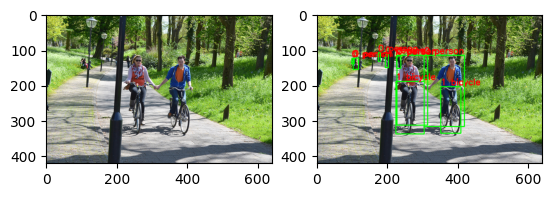

In [ ]:
viz_coco_img('/content/trimmed_coco/new1_instances_train2017_coco_trimmed.json', 7592)


## Visualize yolo annotations

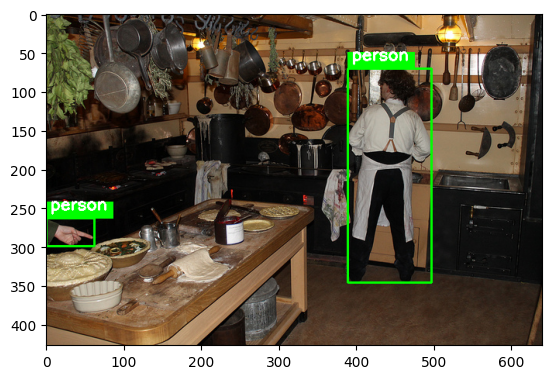

In [ ]:
import matplotlib.pyplot as plt

def visualize_ultralytics_bbox(image, ubbox_list, class_labels, color=(0, 255, 0)):
  for ubbox in ubbox_list:
    class_label, center_x, center_y, width, height = ubbox

    # Get image dimensions
    image_height, image_width, _ = image.shape

    # Convert normalized center to pixel coordinates
    center_x = int(center_x * image_width)
    center_y = int(center_y * image_height)

    # Calculate half width and half height
    half_width = int(width * image_width / 2.0)
    half_height = int(height * image_height / 2.0)

    # Get top left and bottom right corners
    top_left_x = max(0, center_x - half_width)
    top_left_y = max(0, center_y - half_height)
    bottom_right_x = min(image_width - 1, center_x + half_width)
    bottom_right_y = min(image_height - 1, center_y + half_height)

    # Draw bounding box
    cv2.rectangle(image, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), color, 2)

    # Get class label text
    class_label_text = f"{class_labels[class_label]}"

    # Get text size and baseline
    font = cv2.FONT_HERSHEY_SIMPLEX
    text_size, _ = cv2.getTextSize(class_label_text, font, 0.7, 2)
    baseline = text_size[1]

    # Draw background for class label text
    cv2.rectangle(image, (top_left_x, top_left_y), (top_left_x + text_size[0] + 10, top_left_y - baseline - 5), color, -1)

    # Draw class label text
    cv2.putText(image, class_label_text, (top_left_x + 5, top_left_y - baseline + 5), font, 0.7, (255, 255, 255), 2)

  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

def parse_ubbox_file(label_path):
  ubbox_list = []
  with open(label_path, 'r') as label_file:
    label_content = label_file.read().split('\n')
    for bbox_line in label_content:
      bbox = []
      bbox_line = bbox_line.split(' ')
      bbox.append(int(bbox_line[0]))
      bbox.extend([float(i) for i in bbox_line[1:]])
      ubbox_list.append(bbox)
  return ubbox_list

# Example usage (assuming you have loaded the image and have class labels)
image = cv2.imread("/content/coco/images/val2017/000000397133.jpg")
ultralytics_bbox = [50, 0.4, 0.5, 0.2, 0.3]  # Replace with actual bbox
class_labels = ["person", "bicycle", ...]  # Replace with your class labels

visualize_ultralytics_bbox(image, parse_ubbox_file('/content/temp/397133.txt'), class_labels)
